<font color=#000000 size=5 face="微軟正黑體">Import useful library </font>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import os
import argparse
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

<font color=#000000 size=5 face="微軟正黑體">Setting parameters of training </font>

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--batch_size', default = 32, type = int)
parser.add_argument('--epochs', default = 100, type = int)
parser.add_argument('--lr', default = 0.001, type = float)
parser.add_argument('--train_ratio', default = 0.9, type = float)

FLAGS = parser.parse_args([])

<font color=#000000 size=5 face="微軟正黑體">Load Mnist data from tensorflow </font>

In [3]:
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
validation_data = mnist.validation.images  # Returns np.array
validation_labels = np.asarray(mnist.validation.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

train_data = train_data / train_data.max()
validation_data = validation_data /validation_data.max()

train_one_hot = np.zeros((len(train_labels), 10))
train_one_hot[np.arange(len(train_labels)), train_labels] =1

validation_one_hot = np.zeros((len(validation_labels), 10))
validation_one_hot[np.arange(len(validation_labels)), validation_labels] =1

eval_labels_one_hot = np.zeros((len(eval_labels), 10))
eval_labels_one_hot[np.arange(len(eval_labels)), eval_labels] =1

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


<font color=#000000 size=5 face="微軟正黑體">Samples of dataset</font>

Instructions for updating:
Use `tf.global_variables_initializer` instead.


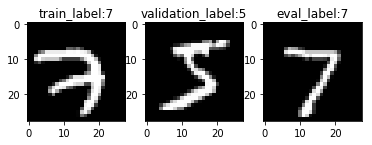

In [4]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables()) #execute init_op
    #print the random values that we sample
    plt.subplot(231)
    plt.gca().set_title('train_label:%d'%train_labels[0])
    plt.imshow(sess.run(tf.reshape(train_data[0], [28,28])),cmap='gray')
    plt.subplot(232)
    plt.gca().set_title('validation_label:%d'%validation_labels[0])
    plt.imshow(sess.run(tf.reshape(validation_data[0], [28,28])),cmap='gray')
    plt.subplot(233)
    plt.gca().set_title('eval_label:%d'%eval_labels[0])
    plt.imshow(sess.run(tf.reshape(eval_data[0], [28,28])),cmap='gray')

<font color=#000000 size=5 face="微軟正黑體">Informations of dataset</font>

In [5]:
print('training set data dimension')
print(train_data.shape)
print(validation_data.shape)
print('training set: %i'%len(train_data))
print('validation set: %i'%len(validation_data))
print('testing set: %i'%len(eval_labels_one_hot))
#資料training set, validation set 分割
x_train, x_valid, y_train, y_valid = train_test_split(train_data, 
                                                      train_one_hot, 
                                                      test_size = 1.0 - FLAGS.train_ratio,
                                                      stratify = train_one_hot.argmax(axis = 1))

training set data dimension
(55000, 784)
(5000, 784)
training set: 55000
validation set: 5000
testing set: 10000


<font color=#000000 size=5 face="微軟正黑體">Model building by tf.layers</font>

In [6]:
tf.reset_default_graph()
with tf.name_scope('input'):
    x_input = tf.placeholder(shape = (None,x_train.shape[1]), 
                             name = 'x_input',
                             dtype=tf.float32)
    y_out = tf.placeholder(shape = (None, y_train.shape[1]), 
                           name = 'y_label',
                           dtype=tf.float32)

with tf.variable_scope('hidden_layer'):
    x_h1 = tf.layers.dense(inputs= x_input, units= 25, activation=tf.nn.relu)
    dropout1 = tf.layers.dropout(inputs=x_h1, rate=0.4)
    x_h2 = tf.layers.dense(inputs= dropout1, units= 25, activation=tf.nn.relu)
    dropout2 = tf.layers.dropout(inputs=x_h2, rate=0.4)
    x_h3 = tf.layers.dense(inputs= dropout2, units= 25, activation=tf.nn.relu)
    dropout3 = tf.layers.dropout(inputs=x_h3, rate=0.4)
    x_h4 = tf.layers.dense(inputs= dropout3, units= 25, activation=tf.nn.relu)
    dropout4 = tf.layers.dropout(inputs=x_h4, rate=0.4)
    x_h5 = tf.layers.dense(inputs= dropout4, units= 25, activation=tf.nn.relu)
    dropout5 = tf.layers.dropout(inputs=x_h5, rate=0.4)
    x_h6 = tf.layers.dense(inputs= dropout5, units= 25, activation=tf.nn.relu)
    dropout6 = tf.layers.dropout(inputs=x_h6, rate=0.4)
    x_h7 = tf.layers.dense(inputs= dropout6, units= 25, activation=tf.nn.relu)
    dropout7 = tf.layers.dropout(inputs=x_h7, rate=0.4)
    x_h8 = tf.layers.dense(inputs= dropout7, units= 25, activation=tf.nn.relu)
    dropout8 = tf.layers.dropout(inputs=x_h8, rate=0.4)
    x_h9 = tf.layers.dense(inputs= dropout8, units= 25, activation=tf.nn.relu)
    dropout9 = tf.layers.dropout(inputs=x_h9, rate=0.4)
    x_h10 = tf.layers.dense(inputs= dropout9, units= 25, activation=tf.nn.relu)

with tf.variable_scope('output_layer'):
    output = tf.layers.dense(x_h10, units=10)

with tf.name_scope('cross_entropy'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y_out))
    
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(output),1), tf.argmax(y_out,1))
    compute_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=FLAGS.lr).minimize(loss)

<font color=#000000 size=5 face="微軟正黑體">Start traing</font>

In [8]:
train_loss_list, valid_loss_list = [], []
train_acc_list, valid_acc_list = [], []
#--------------------------------------sess--------------------------------------------
with tf.Session() as sess:
    # we have to initalize all variables (e.g. weights/biases) at the begin
    sess.run([tf.global_variables_initializer()])
    
    for i in tqdm(range(FLAGS.epochs)):
        # get batch 
        total_batch = int(np.floor(len(x_train) / FLAGS.batch_size)) # just drop out last few samples...
        
        train_loss_collector, train_acc_collector = [], []
        for j in np.arange(total_batch):
            batch_idx_start = j * FLAGS.batch_size
            batch_idx_stop = (j+1) * FLAGS.batch_size

            x_batch = x_train[batch_idx_start : batch_idx_stop]
            y_batch = y_train[batch_idx_start : batch_idx_stop]
            
            this_loss, this_acc, _ = sess.run([loss, compute_acc,train_step],
                                    feed_dict = {x_input: x_batch,
                                                 y_out: y_batch})
            train_loss_collector.append(this_loss)
            train_acc_collector.append(this_acc)
            
        # do validation at the end of each epoch
        valid_acc, valid_loss = sess.run([compute_acc, loss],
                                         feed_dict = {x_input: x_valid,
                                                      y_out : y_valid})
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)
        train_loss_list.append(np.mean(train_loss_collector))
        train_acc_list.append(np.mean(train_acc_collector))

        # at the end of each epoch, shuffle the data
        x_train, y_train = shuffle(x_train, y_train)
    # At the end of the training, do testing set
    test_acc, test_loss = sess.run([compute_acc, loss],
                                    feed_dict = {x_input: eval_data,
                                                 y_out : eval_labels_one_hot})
print('--- training done ---')
print('testing accuracy: %.2f' % test_acc)

100%|██████████| 100/100 [08:03<00:00,  4.84s/it]

--- training done ---
testing accuracy: 0.96


<font color=#000000 size=5 face="微軟正黑體">Loss and accuracy when training</font>

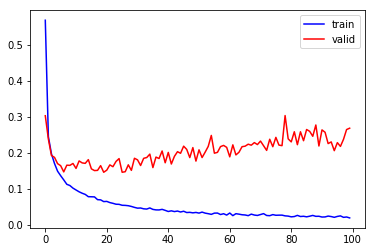

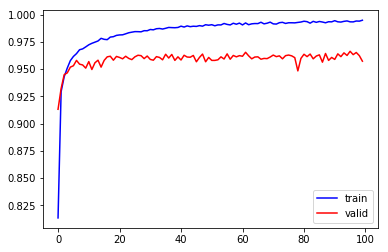

In [9]:
plt.plot(np.arange(len(train_loss_list)), train_loss_list, 'b', label = 'train')
plt.plot(np.arange(len(valid_loss_list)), valid_loss_list, 'r', label = 'valid')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc_list)), train_acc_list, 'b', label = 'train')
plt.plot(np.arange(len(valid_acc_list)), valid_acc_list, 'r', label = 'valid')
plt.legend(loc = 4)
plt.show()